In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = "C:/Users/mehul/Documents/Python Scripts/HPC Project/Images"
CATEGORIES = ["Covid", "notCovid"]
NAME = "HPC-Project-CNN"

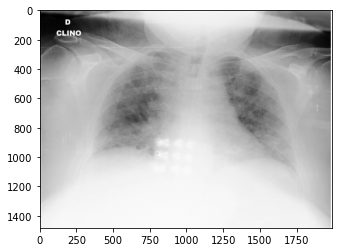

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

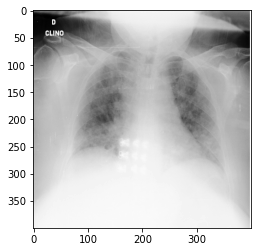

In [4]:
IMG_SIZE = 400

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
print(len(training_data))

1847


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[: 5]:
    print(sample[1])

1
1
1
1
1


In [9]:
X = []
y = []

In [10]:
for features, labels in training_data:
    X.append(features)
    y.append(labels)

x = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
x.shape

(1847, 400, 400, 1)

In [12]:
y.shape

(1847,)

In [13]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [15]:
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [16]:
x = x/255.0

model  = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(32))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.fit(x, y, epochs = 4, batch_size = 64, validation_split = 0.1, callbacks=[tensorboard])

Epoch 1/4
26/26 [==============================] - 83s 3s/step - loss: 0.0307 - accuracy: 0.9910 - val_loss: 0.0462 - val_accuracy: 0.9838
Epoch 2/4
26/26 [==============================] - 91s 4s/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0468 - val_accuracy: 0.9730
Epoch 3/4
26/26 [==============================] - 87s 3s/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.0818 - val_accuracy: 0.9784
Epoch 4/4
26/26 [==============================] - 87s 3s/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.0730 - val_accuracy: 0.9784


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 307328)            0

In [20]:
a=list(model.history.history['accuracy'])
b=list(model.history.history['val_accuracy'])
max_train=100*np.round(max(a),4)
max_validation=100*np.round(max(b),4)

#Finding max of Training accuracy
print("Maximum Training Accuracy is",max_train)

#Finding max  validation accuracy
print("Maximum Validtion Accuracy is",max_validation)

Maximum Training Accuracy is 99.82
Maximum Validtion Accuracy is 98.38


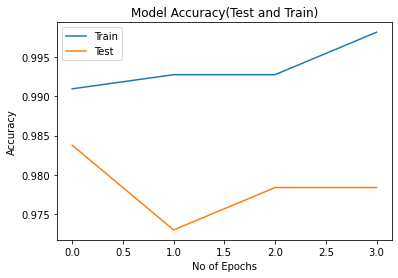

In [21]:
#Plotting Test vs Train Accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy(Test and Train)')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


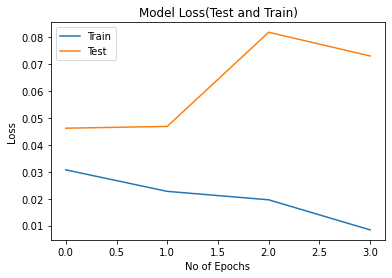

In [22]:
#Plotting Test vs Train Loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss(Test and Train)')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


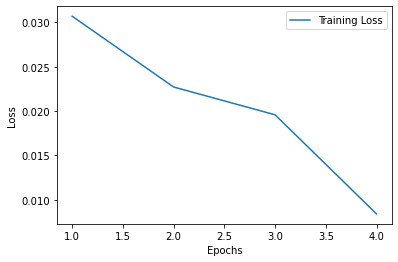

In [23]:
loss_values = model.history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

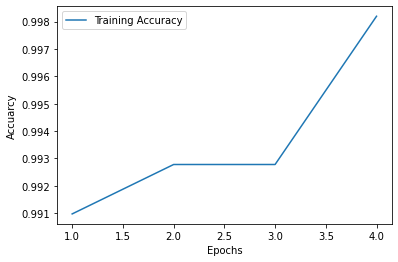

In [26]:
acc_values = model.history.history['accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

In [27]:
img = cv2.imread('test_image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllwindows()

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllwindows'

In [28]:
image1 = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
reshaped = np.reshape(image1,(-1,400,400,1))
normalized = img/255.0
result=model.predict(reshaped)
x = result[0][0]
if(x == 0):
    print("Covid")
else:
    print("No-Covid")

Covid


In [29]:
img = cv2.imread('test_image3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image1 = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
reshaped = np.reshape(image1,(-1,400,400,1))
normalized = img/255.0
result=model.predict(reshaped)
x = result[0][0]
if(x == 0):
    print("Covid")
else:
    print("No-Covid")

No-Covid
